## ML Project California Housing 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the Dataset

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
california = fetch_california_housing()

In [4]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
## Description
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

## Preparing the Dataset

In [6]:
dataset = pd.DataFrame(california.data, columns = california.feature_names)

In [7]:
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [8]:
dataset['MHV'] = california.target

In [9]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MHV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   MHV         20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [11]:
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MHV
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [12]:
## Check for Missing Values
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
MHV           0
dtype: int64

## Exploratory Data Analysis

In [13]:
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MHV
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MHV,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: xlabel='MedInc', ylabel='MHV'>

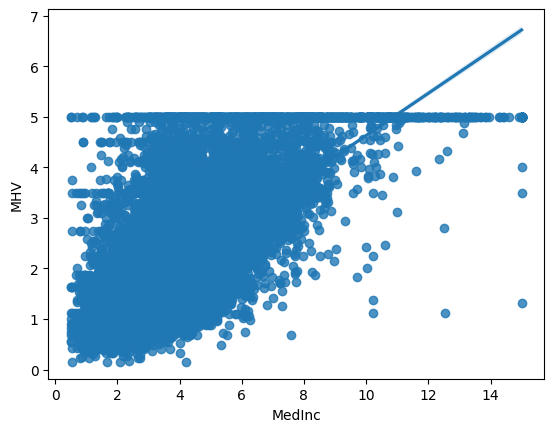

In [14]:
import seaborn as sns
sns.regplot(x = 'MedInc',y = 'MHV',data = dataset)

<Axes: xlabel='AveRooms', ylabel='MHV'>

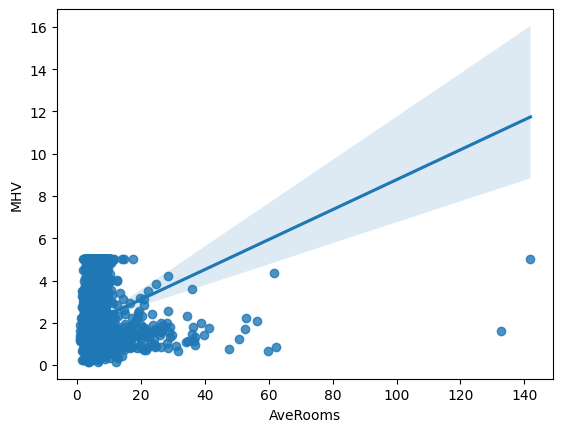

In [15]:
sns.regplot(x = 'AveRooms',y = 'MHV', data = dataset)

<Axes: xlabel='Population', ylabel='MHV'>

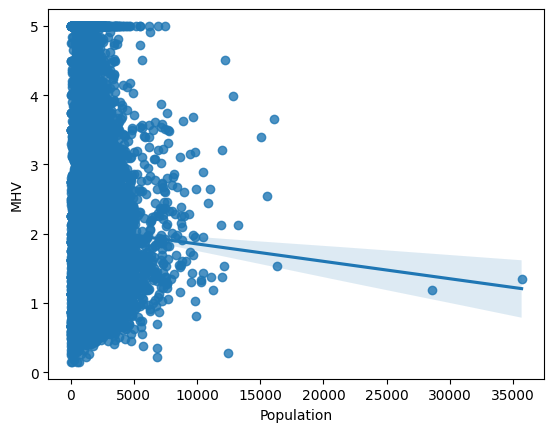

In [16]:
sns.regplot(x = 'Population',y = 'MHV', data = dataset)

<Axes: xlabel='AveBedrms', ylabel='MHV'>

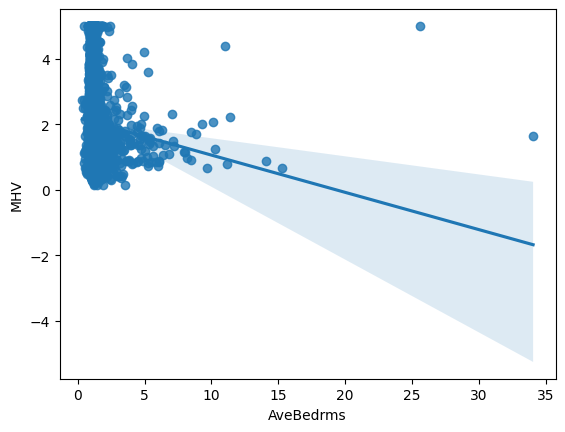

In [17]:
sns.regplot(x = 'AveBedrms',y = 'MHV', data = dataset)

## Removing Outliers

In [18]:
def remove_outliers_iqr(df, features):
    df_clean = df.copy()
    for feature in features:
        Q1 = df_clean[feature].quantile(0.25)
        Q3 = df_clean[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[feature] >= lower_bound) & (df_clean[feature] <= upper_bound)]
    
    return df_clean

In [19]:
features_to_clean = dataset.columns

In [20]:
dataset_new = remove_outliers_iqr(dataset, features_to_clean)

In [21]:
dataset_new.shape

(16232, 9)

In [22]:
dataset_new = dataset_new.reset_index(drop=True)

In [23]:
dataset_new

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MHV
0,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
1,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
2,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
3,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
4,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
...,...,...,...,...,...,...,...,...,...
16227,3.7125,28.0,6.779070,1.148256,1041.0,3.026163,39.27,-121.56,1.168
16228,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
16229,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
16230,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## Independent and Dependent Features

In [24]:
X = dataset_new.iloc[:,:-1]
Y = dataset_new['MHV']

In [25]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
1,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
2,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
3,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
4,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25


In [26]:
Y.head()

0    3.413
1    3.422
2    2.697
3    2.992
4    2.414
Name: MHV, dtype: float64

## Train Test Split

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2,random_state= 42)

In [28]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
3474,1.9063,52.0,3.603399,0.912181,984.0,2.787535,34.09,-118.29
13885,5.9399,10.0,6.036424,1.048565,3083.0,3.402870,37.30,-121.79
883,3.5532,36.0,4.534946,1.000000,950.0,2.553763,37.68,-121.77
3707,3.5909,25.0,4.126506,1.064759,1420.0,2.138554,34.07,-118.32
543,4.6042,51.0,6.664122,1.025445,922.0,2.346056,37.73,-122.14
...,...,...,...,...,...,...,...,...
13418,2.5694,27.0,3.143770,0.955272,777.0,2.482428,34.43,-119.72
5390,3.6083,33.0,5.445000,1.112500,1153.0,2.882500,34.09,-118.07
860,6.0604,20.0,6.219409,0.993671,1181.0,2.491561,37.67,-121.89
15795,2.5729,16.0,5.241259,1.139860,733.0,2.562937,38.04,-120.35


## Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [30]:
X_train = scaler.fit_transform(X_train)

In [31]:
X_test = scaler.transform(X_test)

## Model Training

In [32]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [33]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [34]:
reg_predict = model.predict(X_test)

In [35]:
reg_predict

array([1.60585, 0.97064, 3.35937, ..., 1.60672, 2.36158, 2.45422])

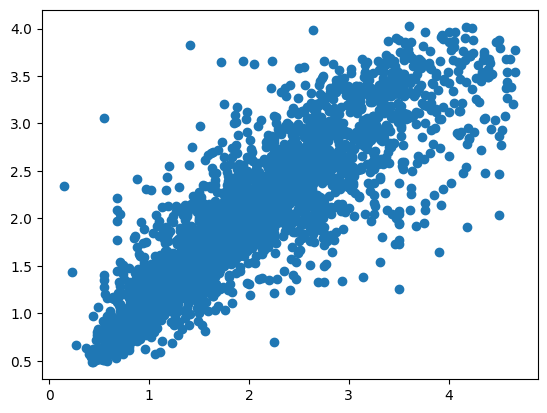

In [36]:
## Scatter Plot for the Prediction
plt.scatter(y_test,reg_predict)

In [37]:
## Residuals
residuals = y_test-reg_predict

In [38]:
residuals

6179    -0.06985
7447    -0.25564
7309     0.87263
9309    -0.07234
10765   -0.45600
          ...   
15588   -0.16048
14453    0.91860
14692    0.10528
5090    -0.00958
8596    -0.14822
Name: MHV, Length: 3247, dtype: float64

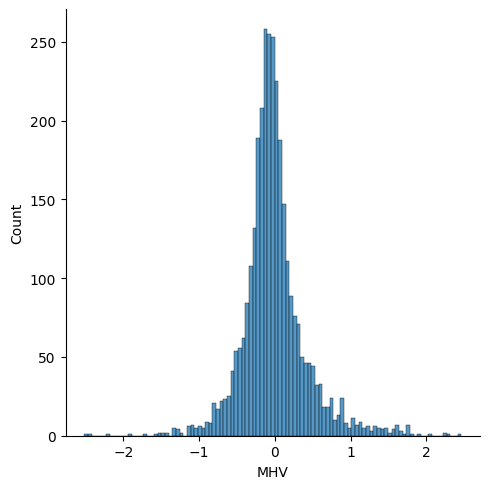

In [39]:
## Plotting the residuals
sns.displot(residuals)

In [40]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_predict))
print(mean_absolute_error(y_test,reg_predict))
print(np.sqrt(mean_absolute_error(y_test,reg_predict)))

0.29102180782260545
0.29102180782260545
0.5394643712263169


## R square and adjusted R square

In [41]:
# R Square
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_predict)
print(score)

0.7794823366543094


In [42]:
# Adjusted R Square
1- (1-score)*(len(y_test)-1)/(len(y_test) - X_test.shape[1]-1)

0.7789375122853268

## New Data Prediction

In [43]:
def prediction_func(input_array, scaler,model):
    input_scaled = scaler.transform(input_array)
    predictions = model.predict(input_scaled)
    return predictions

In [44]:
california.data[0].reshape(1,-1)

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [45]:
prediction_func(california.data[0].reshape(1,-1),scaler,model)

C:\Users\91976\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([3.72659])

## Pickling the Model file For Deployment

In [46]:
import pickle

In [47]:
pickle.dump({'model': model, 'scaler': scaler}, open('regmodel.pkl', 'wb'))

In [48]:
pickled_model = pickle.load(open('regmodel.pkl', 'rb'))

model = pickled_model['model']
scaler = pickled_model['scaler']


In [49]:
sample_input = california.data[0].reshape(1, -1)
prediction = prediction_func(sample_input, scaler, model)


C:\Users\91976\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [50]:
print(prediction)

[3.72659]
